# Sentiment Analysis using Python; Twitter on the upcoming James Bond movie
## Introduction

James Bond is one of the longest continually-running film series in history, having been in on-going production from 1962 to the present. The upcoming movie titled as "No Time To Die" (25th instalment) goes out on April 2020 and while it is much anticipated, it may be wise (for the production) to take a census of the audience's desires and adapt the montage procedure accordingly. In this context, Sentiment Analysis could become a valuable tool...

In brief, Sentiment Analysis refers to a set of techniques used to identify and extract subjective information from a large source-dataset, usually comprised of text. The final scope is to study the "mined" material in a deep and thorough, yet comprehensive for human beings, way that may outcome considerable insights of the social sentiment upon various topics.

**Scope**: 
This project aims to establish a basic implementation of sentiment analysis on Twitter data with Python, in order to determine the attitude of the audience upon the upcoming James Bond movie "No Time to Die", earliest referred to as #Bond25. We are going to use a series of free Python libraries (Pandas, Tweepy, TextBlob) and the Twitter API for data collection (web scraping), depicting finally a couple of data visualizations to better communicate the nuanced narrative of the findings. 

Additionally, we investigate any underlying trends of sentiment across specific countries, answering questions like: *Are the British people more inclined to be in favour of their traditional agent due to his origin? How does the Americans position themselves against a blockbuster that does not belong to their Hollywood system?*

[*It stands as an independent analysis in an effort to enhance my ability to communicate results, reason about data and stay motivated to continuously implement newly aquired skills & capabilities, so as to enrich my portfolio of data science-oriented projects*]

## I. Set Up
Firstly, we  import the Tweepy and Pandas libraries in the Jupyter notebook file and right next we proceed to the authentication:

In [1]:
# Import the libraries
import tweepy
import pandas as pd

In [2]:
# Authentication
consumer_key = '12GMddCerYjkU3UpRdwqYtpy2gJ' 
consumer_secret = 'Q88Ytpy2gJrYy2jJtkkU3UpwqY'
access_token = 'B4BDDwqerYpwy2qrderYpwy2wqYtpy2gJ'
access_token_secret = 'klYU3UpwBpjJtdCerYkk4BDDwm'

The keys and tokens are indicative. Both are private and should be treated likewise, as they are connected to your personal Twitter account.

We then create an 'OAuthHandler' instance and next pass it into the API method, as follows:

In [3]:
# Create an OAuthHandler instance
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [4]:
# Pass the OAuthHandler instance into the API method
api = tweepy.API(auth)

We are now ready to test for the functionality of querring the Twitter API (making requests to the remote web server and retrieving the data we need). We run the following code snippet, which basically returns our timeline right at the moment:

In [32]:
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.user.name, tweet.text)

Likelihood T. Prior @JAMANetworkOpen @yudapearl https://t.co/xvbIHDpJoi
Archonsec RT @GeekOnTheLoose: Happy #Festivus, people.

@robmay70 @sewcraftyme @ravici @SpaceForceCad @SpiritualDiabet @KindaBirdBraind @DrJDrooghaag…
🌍🌎 un ciudadano global☝️🌏👨‍🎓😅 RT @Koketso_Dikane: Thought I should make a thread for people that find it hard to understand why I have so little faith in God and why I d…
Likelihood T. Prior 9 out of 10 of the most talked about @JAMANetworkOpen papers of 2010 are "association" studies. Feeling @yudapearl… https://t.co/1tMk7Y6DSf
Programming Wisdom "Sometimes it pays to stay in bed on Monday, rather than spending the rest of the week debugging Monday's code." - Christopher Thompson
Rstats RT @nordholmen: @gvwilson @StatGarrett Indeed great method. I got to know it for #rstats as "vignette-driven development" by @edzerpebesma.
Rstats RT @LindsayRCPlatt: A #reproducible #rstats #waterscience holiday card. It just doesn't get any cooler than that🎄 https://t.co/5USMym9bcI

## II. Sentiment Analysis
### API Requests
At first, we fetch the data needed for the analysis to be done. For reusability purposes, we opt to create a function that gets an argument ('hastag') as input and returns a dataframe of the necessary information.

In [5]:
# Create a function to group all the actions to fetch data from the API
def fetch_tweets(hashtag):
    tweet_user = []
    tweet_time = []
    tweet_string = []
   
    for tweet in tweepy.Cursor(api.search,q=hashtag, count=1600).items(1600):
            if (not tweet.retweeted) and ("RT @" not in tweet.text):
                if tweet.lang == "en":
                    tweet_user.append(tweet.user.name)
                    tweet_time.append(tweet.created_at)
                    tweet_string.append(tweet.text)
                    
    df = pd.DataFrame({"username":tweet_user, "time": tweet_time, "tweet": tweet_string})
    return df

In [6]:
bond_df = fetch_tweets("Bond25")

In [7]:
print(bond_df.shape)
bond_df.head(10)

(140, 3)


,username,time,tweet
0,Springhouse,2019-12-23 12:18:17,#JamesBond #Bond25 #NoTimeToDie #BondJamesBond...
1,Springhouse,2019-12-23 11:35:05,#JamesBond #Bond25 #NoTimeToDie #BondJamesBond...
2,JamesBond007news.com,2019-12-23 10:44:08,burned-down Piggy's in Jamaica (where #NoTimeT...
3,UIPSA,2019-12-23 08:00:00,No introductions needed. You know who it is 😎 ...
4,Stephen Lehman,2019-12-23 05:08:17,He would be perfect.\n#Bond25 #notimetodie htt...
5,James Askew,2019-12-23 03:54:52,Why does Freddie Mercury want to kill James Bo...
6,Chris,2019-12-23 03:27:10,#Bond25 commercial with Rami while we’re watch...
7,Rob B Movie Cult,2019-12-23 00:42:36,Just listened to this episode. So much fun. ...
8,Emmet Kennedy,2019-12-23 00:32:21,@Galway_don1 @BuckleyKevin @CheltenhamRaces @R...
9,Springhouse,2019-12-22 21:45:01,#JamesBond #Bond25 #NoTimeToDie #BondJamesBond...


### Sentiment Scores
At this point we are ready to use the TextBlob library and get back the sentiment score, which is based on polarity (more on this [here](https://textblob.readthedocs.io/en/dev/api_reference.html#textblob.blob.TextBlob.sentiment)). A 'lambda' function returning the polarity score for each tweet, is created and passed directly as an argument into the 'apply()' one. The latter applies the former one along the column 'tweet'.

In [8]:
# Import the TextBlob library to process textual data whilst engage with the sentiment analysis task.
from textblob import TextBlob

In [9]:
# Check for functionality
sent_score_1 = TextBlob("I really love the upcoming Bond25").sentiment
sent_score_2 = TextBlob("I really hate the upcoming Bond25").sentiment
print("Sentiment Score 1:", sent_score_1)
print("Sentiment Score 2:", sent_score_2)

Sentiment Score 1: Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment Score 2: Sentiment(polarity=-0.8, subjectivity=0.9)


In [10]:
# Add a new column that shows the sentiment value - polarity is chosen
bond_df["sentiment"] = bond_df["tweet"].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
print(bond_df.head())

               username                time  \
0           Springhouse 2019-12-23 12:18:17   
1           Springhouse 2019-12-23 11:35:05   
2  JamesBond007news.com 2019-12-23 10:44:08   
3                 UIPSA 2019-12-23 08:00:00   
4        Stephen Lehman 2019-12-23 05:08:17   

                                               tweet  sentiment  
0  #JamesBond #Bond25 #NoTimeToDie #BondJamesBond...        0.0  
1  #JamesBond #Bond25 #NoTimeToDie #BondJamesBond...        0.0  
2  burned-down Piggy's in Jamaica (where #NoTimeT...        0.0  
3  No introductions needed. You know who it is 😎 ...        0.0  
4  He would be perfect.\n#Bond25 #notimetodie htt...        1.0  


We then count the positive and negative scores of sentiments:

In [11]:
# Boolean indexing the df to distinguish postitive and negative sentiments
bond_df_pos = bond_df[bond_df["sentiment"] > 0.0]
bond_df_neg = bond_df[bond_df["sentiment"] < 0.0]
print("Positive Tweets:", len(bond_df_pos))
print("Negative Tweets:", len(bond_df_neg))

Positive Tweets: 49
Negative Tweets: 15


In [12]:
# Wrap the tweet fetching and sentiment calculation to one function
def calc_sentiment(hashtag):
    df = fetch_tweets(hashtag)
    df["sentiment"] = df["tweet"].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
    df_pos = df[df["sentiment"] > 0.0]
    df_neg = df[df["sentiment"] < 0.0]
    print("Positive Tweets on #{}: ".format(hashtag), len(df_pos))
    print("Negative Tweets on #{}: ".format(hashtag), len(df_neg))

In [13]:
calc_sentiment("Bond25")

Positive Tweets on #Bond25:  49
Negative Tweets on #Bond25:  15


### Data Visualization
Finally, using the Python 2D plotting library 'Matplotlib', we can easily depict our results on a pie chart, using the following function:

In [14]:
# Use the magic function that sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

# Import the libraries to plot
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Use a magic that doubles resolution plot output for Retina screens only
%config InlineBackend.figure_format ='retina'

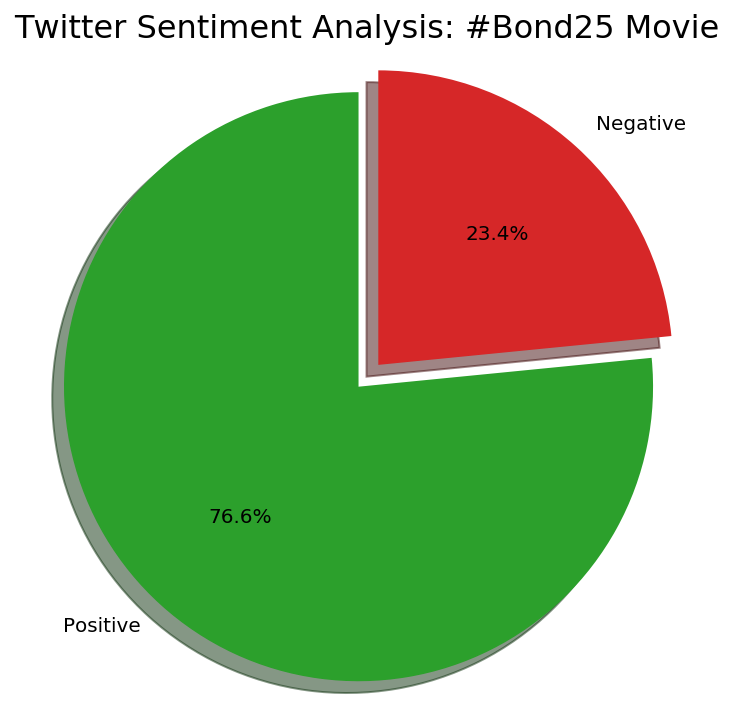

In [16]:
fig1, ax1 = plt.subplots(figsize=(6,6))

labels = ['Positive', 'Negative']
sizes = [len(bond_df_pos), len(bond_df_neg)]
explode = (0, 0.1)  # only "explode" the 2nd slice

tb_10_green = (44/255,160/255,44/255)
tb_10_red = (214/255,39/255,40/255)
colors=[tb_10_green, tb_10_red]

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Twitter Sentiment Analysis: #Bond25 Movie", fontsize=16)
    
plt.show()

In [33]:
# Wrap the ploting actions to one function
def draw_sentiment(pos,neg,hashtag):
    fig1, ax1 = plt.subplots(figsize=(6,6))
    
    labels = ['Positive', 'Negative']
    sizes = [pos,neg]
    explode = (0, 0.1)  # only "explode" the 2nd slice

    tb_10_green = (44/255,160/255,44/255)
    tb_10_red = (214/255,39/255,40/255)
    colors=[tb_10_green, tb_10_red]

    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    #ax1.set_title("Twitter Sentiment Analysis on #{}: ".format(hashtag), fontsize=13)

    plt.show()

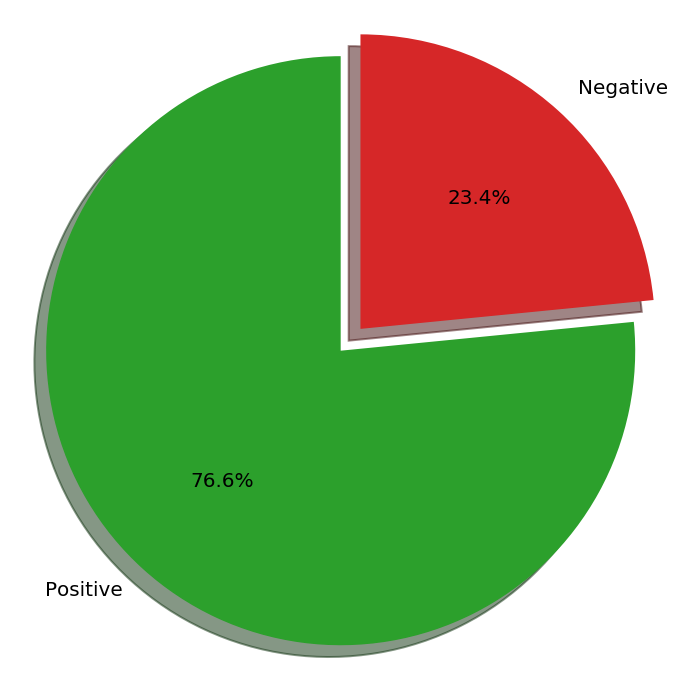

In [34]:
draw_sentiment(len(bond_df_pos), len(bond_df_neg), "Bond25")

A percentage of 78% among the analysed tweets have positive sentiment, regarding the upcoming '007' movie! It might be very interesting to further explore the this result across different countries. The next section enlightens us to this direction.

## III. Location Based Sentiment Analysis
In this part of the project, we investigate any underlying trends of sentiment across the UK and the USA. Fortunately, Twitter provides the developers with quite a "mellow" API, where anyone can find a long list of "root-level" [attributes](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object) for the Tweet object. In our case, the `location` one serves our purpose to fetch the necessary location data of the users tweeted on the topic, albeit not always represents a location, nor is it machine-parseable.

At first, we enrich the 'fetch_tweets' function with a new boolean argument 'locate' that triggers the process of fetching the 'location' attribute.

In [19]:
# Enrich the fetch_tweets function to include (or not) location data of tweets
def fetch_tweets(hashtag, locate):
    tweet_user = []
    tweet_user_location = []
    tweet_time = []
    tweet_string = []
   
    for tweet in tweepy.Cursor(api.search,q=hashtag, count=2000).items(2000):
            if (not tweet.retweeted) and ('RT @' not in tweet.text):
                if tweet.lang == "en":
                    tweet_user.append(tweet.user.name)
                    tweet_time.append(tweet.created_at)
                    tweet_string.append(tweet.text)
                    if locate:
                        tweet_user_location.append(tweet.user.location)
                        df = pd.DataFrame({'username':tweet_user, 'location':tweet_user_location, 'time': tweet_time, 'tweet': tweet_string})
                    else:
                        df = pd.DataFrame({'username':tweet_user, 'time': tweet_time, 'tweet': tweet_string})
    
    return df

In [20]:
loc_bond_df = fetch_tweets("Bond25",locate=True)

Following, we evaluate the unique locations of the newly introduced column and get a brief sense of how to effectively manipulate them:

In [21]:
loc_bond_df["location"].value_counts()

Sweden                            39
                                  20
USA                               10
Mumbai, India                      5
England, United Kingdom            4
South Africa                       3
Japan                              3
Dublin, Ireland                    3
Australia 🇦🇺                       2
Barcelona ● España                 2
San Antonio, TX                    2
1912 L Street NW Washington DC     1
London, England                    1
Exeter, Devon, UK                  1
Los Angeles, CA                    1
At home                            1
United States                      1
Costa Rica                         1
NYC ➡➡➡ Indianapolis               1
South Australia, Australia         1
Newcastle upon Tyne, UK            1
World Wide Web                     1
Brighton, England                  1
NC/FL                              1
Near Chichester harbour.           1
London, Ontario                    1
Scotland                           1
A

In [22]:
loc_bond_df["location"].unique()

array(['Sweden', 'Japan', 'South Africa', 'United States', '',
       'Austin, TX', 'USA', 'Kilkenny, Cork, London, C-53',
       'London, Ontario', 'NC/FL', 'Australia 🇦🇺 ', 'Dublin, Ireland',
       'Near Chichester harbour. ', '1912 L Street NW Washington DC',
       'England, United Kingdom', 'Newcastle upon Tyne, UK',
       'Exeter, Devon, UK', 'Norway', 'Locked in the trunk of a car',
       'Buntland ', 'Barcelona ● España', 'Gaborone',
       'Torrimar,Guaynabo,Puerto Rico', 'Hollywood, CA',
       'Australia  🇦🇺  ', 'London', 'Los Angeles, CA',
       'Newcastle, England', 'London, UK', 'At home', 'Mumbai',
       'Shining City on the Hill', 'Brighton, England',
       'Washington, D.C.', 'Hollywood', 'South Australia, Australia',
       'World Wide Web', 'London, England', 'Scotland', 'Mumbai, India',
       'San Monique', 'Germany', 'Washington DC', 'Paris, France',
       'NYC ➡➡➡ Indianapolis ', 'NYC ✈✈✈ Indianapolis',
       'Greifswald to Hamburg', 'Athens, Greece', 'En

### Location Selection via RegEx
Apparently, UK is declared with quite a few names by the users, including: UK, England, London, etc. To overpass this obstacle we act perceptively and opt to create a RegEx. In that way, we are capable to "capture" our location of interest through this "blurry" pool of names, by referring any bordering with London places (the same applies to the USA case). As you can see, the result is quite rewarding!

In [23]:
# Import the module that provides regular expression matching operations
import re

# Constract a regex so as to match with most of the around-UK locations
uk_pattern = r"\bEngland\b|\bUK\b|\bLondon\b|\bScotland\b|\bIreland\b"

# Create a copy of the original df to avoid 'SettingwithCopyWarning'
uk_bond_df = loc_bond_df.copy()

# Add a new column to show the extracted locations
uk_bond_df = uk_bond_df[uk_bond_df["location"].str.contains(uk_pattern,flags=re.I)]

In [24]:
uk_bond_df

,username,location,time,tweet
8,Emmet Kennedy,"Kilkenny, Cork, London, C-53",2019-12-23 00:32:21,@Galway_don1 @BuckleyKevin @CheltenhamRaces @R...
13,Fortune_Teller,"London, Ontario",2019-12-22 17:19:48,@NicoleArbour @sonic_hedgehog No deal. My two ...
18,Robert Craven ☘ 📖,"Dublin, Ireland",2019-12-22 12:18:41,#lastminutegifts \n#Christmas \n#Dublin #Irela...
24,𝔾𝕖𝕠𝕣𝕘𝕖 ℝ𝕚𝕕𝕘𝕖𝕣𝕤 🎄,"England, United Kingdom",2019-12-21 20:30:38,Unpopular opinion: Casion Royale is the best J...
27,Michael Livingstone,"Newcastle upon Tyne, UK",2019-12-21 15:24:34,"To buy, this week! #JamesBond #DanielCraig #No..."
31,6th Exeter Scouts,"Exeter, Devon, UK",2019-12-21 09:07:34,Nearly christmas but still time for one last e...
50,Martine Richards,London,2019-12-19 17:34:58,Saw a trailer for #Bond25 last weekend. Can’t ...
53,Stevo,"Newcastle, England",2019-12-19 16:40:55,Fan Art Piece for @007 \nBeen a fan of James B...
59,Count,"London, UK",2019-12-19 10:02:06,The new Bond film is tipped to be Daniel Craig...
64,Creature Creature,"Brighton, England",2019-12-18 21:12:48,THIRTY THOUSAND VIEWS?! If you haven’t seen ou...


In [25]:
# Act as in the UK case...
us_pattern = r"\bUSA\b|\bUS\b|\bNYC\b"
us_bond_df = loc_bond_df.copy()
us_bond_df = us_bond_df[us_bond_df["location"].str.contains(us_pattern,flags=re.I)]
us_bond_df

,username,location,time,tweet
7,Rob B Movie Cult,USA,2019-12-23 00:42:36,Just listened to this episode. So much fun. ...
29,Rob B Movie Cult,USA,2019-12-21 13:16:37,I've had Boy George's No Time to Die stuck in ...
47,Rob B Movie Cult,USA,2019-12-19 20:40:40,Highly recommend this hilarious #JamesBond pod...
49,Rob B Movie Cult,USA,2019-12-19 17:44:26,"Even more so than For Your Eyes Only, I think ..."
54,Rob B Movie Cult,USA,2019-12-19 13:55:39,Today's Dr. No inspired attire\n\n#Bond25 #Bon...
62,Rob B Movie Cult,USA,2019-12-19 00:50:03,Everything about OHMSS is why I love Bond. Ca...
87,Rob B Movie Cult,USA,2019-12-17 23:07:17,What is Daniel Craig's favorite type of Christ...
89,Rob B Movie Cult,USA,2019-12-17 21:17:59,"I just hit 1,000 followers. Where are the fuc..."
100,Glacé Entertainment PR™,NYC ➡➡➡ Indianapolis,2019-12-17 16:51:37,"@ToniEmbry, we ALLL already know you'd make on..."
101,Toni Embry,NYC ✈✈✈ Indianapolis,2019-12-17 16:40:26,💎💎💎s really are the only things that are forev...


### Sentiment Scores & Data Visualization
Finally, the `calc_sentiment` function can also be optimised; this time we additionally pass the location-based dataframe (UK or US) as an argument, getting finally the following results:

In [35]:
# Update the combined function of tweet fetching and sentiment calculation
def calc_sentiment(hashtag, dataframe):
    df = dataframe
    df["sentiment"] = df["tweet"].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
    df_pos = df[df["sentiment"] > 0.0]
    df_neg = df[df["sentiment"] < 0.0]
    print("Positive Tweets on #{}: ".format(hashtag), len(df_pos))
    print("Negative Tweets on #{}: ".format(hashtag), len(df_neg))
    return (len(df_pos), len(df_neg))

In [40]:
uk_sentiment = calc_sentiment("Bond25", uk_bond_df)
print(uk_sentiment)

Positive Tweets on #Bond25:  12
Negative Tweets on #Bond25:  1
(12, 1)


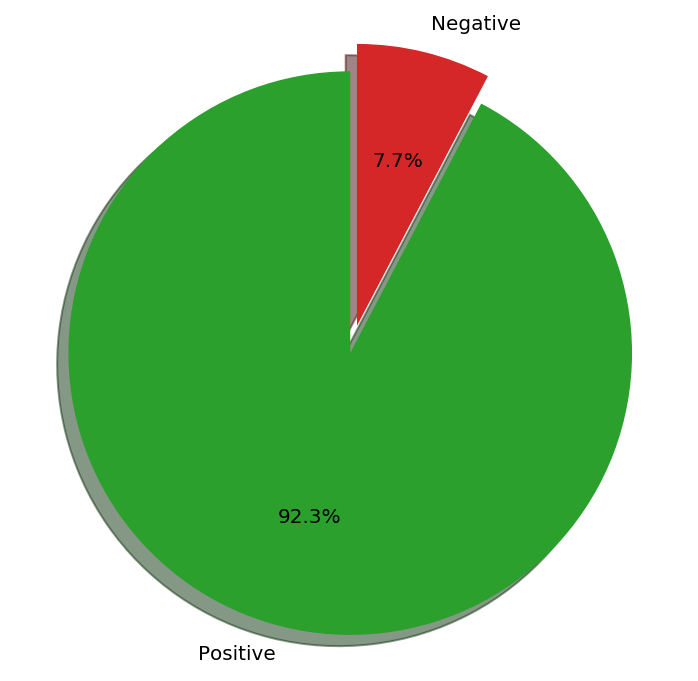

In [41]:
draw_sentiment(uk_sentiment[0], uk_sentiment[1], "Bond25")

In [29]:
us_sentiment = calc_sentiment("Bond25", us_bond_df)
print(us_sentiment)

Positive Tweets on #Bond25:  7
Negative Tweets on #Bond25:  2
(7, 2)


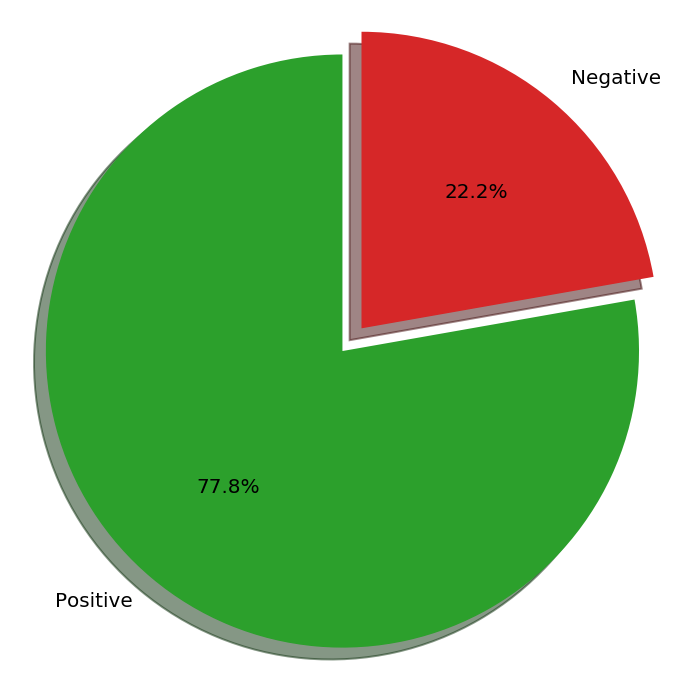

In [38]:
draw_sentiment(us_sentiment[0], us_sentiment[1], "Bond25")

More than expected, Britons accept in a more expressive way their '00' agent and anticipate the upcoming movie. A 'generous' 92% percentage of the analysed sample of tweets give credits to the movie. On the other side (of Atlantic), Americans do not show such an excitement. Nevertheless, they also express positive sentiment toward the film of about 78 % of the sampled tweets.

## Conclusions
Just like many major industries, the film one can also get rewarded by adapting state of the art techniques coming from the Data Science. The age of extracting meaningful insights from social media data has already arrived and promises much.

In this project we introduced a basic version of Sentiment Analysis, extrapolated  the audience feelings in respect to the entitled movie and easily came to a couple of prolific inferences, by implementing the technique across different locations. The resulting numbers of tweets may be very low (for a free developer account of Twitter), but what interests us mostly is not the absolute values themselves, but rather the underlying "mechanisms" of the analysis. In this context, anyone could easily argue in favour the technique and how could it be further developed and refined by the film industry, proportionately.
## Additional Analysis

There is quite a number of additional analyses to be performed, expanding this one. You are welcome to extend and shape yours in any direction you may prefer. For instance, how was the audience used to reacting on Twitter before the movie trailer went out on December 4th and how after that? 
*Hint: A respective analysis based on the created_at attribute can be easily developed.*